/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


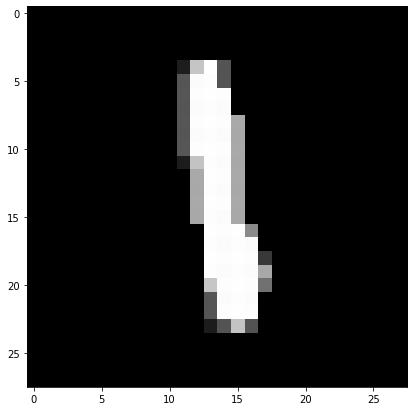

In [1]:
# Global structure retention

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load sample data
df = pd.read_csv('../python-ds-resources/mnist_train.csv')
d = df.drop("label", axis=1)

plt.figure(figsize=(7,7))
index = 200

grid_data = d.iloc[index].as_matrix().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

In [2]:
# PCA load

## Steps
## Form column standardized matrix, get covariance matrix, find eigne vector and multiply eigen vector with srandardized matrix.
from sklearn.preprocessing import StandardScaler

l = df['label']
labels = l.head(15000)
data = d.head(15000)

print(labels.shape)
print(data.shape)

# standardize data -> mean removal and variance scaling -> distribution will have mean value 0 and std dev 1
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
covar_matrix = np.matmul(standardized_data.T, standardized_data)
print(covar_matrix.shape)



(15000,)
(15000, 784)
(15000, 784)
(784, 784)


In [3]:
# example for standard scaler

from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(data)
print(scaled_data)
print(scaled_data.mean(axis = 0))
print(scaled_data.std(axis = 0))


[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]
[0. 0.]
[1. 1.]


In [4]:
from scipy.linalg import eigh

# 782 and 783 indicate top 2 eigen values
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
new_coordinates = np.matmul(vectors, standardized_data.T)
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
pca_df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(pca_df.head())

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)
   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


In [5]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
print(pca_df.head())


shape of pca_reduced.shape =  (15000, 3)
   1st_principal  2nd_principal  label
0      -0.960767      -4.456610    5.0
1       8.658173      -7.398032    0.0
2       2.082864       9.640803    4.0
3      -7.187470      -3.356049    1.0
4      -4.933914       2.980017    9.0
